# Data Preparing

In [1]:
# Instances data

import pickle
with open('data.pkl', 'rb') as file:
    data_r = pickle.load(file)

In [2]:
data_r[0]

{'ran_seed': 1,
 'nodes_coor': [[0.417022004702574, 0.7203244934421581],
  [0.00011437481734488664, 0.30233257263183977],
  [0.14675589081711304, 0.0923385947687978],
  [0.1862602113776709, 0.34556072704304774],
  [0.39676747423066994, 0.538816734003357],
  [0.4191945144032948, 0.6852195003967595],
  [0.20445224973151743, 0.8781174363909454],
  [0.027387593197926163, 0.6704675101784022],
  [0.41730480236712697, 0.5586898284457517],
  [0.14038693859523377, 0.1981014890848788],
  [0.8007445686755367, 0.9682615757193975],
  [0.31342417815924284, 0.6923226156693141],
  [0.8763891522960383, 0.8946066635038473],
  [0.08504421136977791, 0.03905478323288236],
  [0.1698304195645689, 0.8781425034294131],
  [0.0983468338330501, 0.42110762500505217],
  [0.9578895301505019, 0.5331652849730171],
  [0.6918771139504734, 0.31551563100606295],
  [0.6865009276815837, 0.8346256718973729],
  [0.018288277344191806, 0.7501443149449675]],
 'opt_route': [0,
  5,
  11,
  6,
  14,
  19,
  7,
  15,
  1,
  13,
  2

In [3]:
# NCO Embeddings

with open('lehd_decoder_emb.pkl', 'rb') as file:
    node_embed = pickle.load(file)

In [4]:
node_embed[0]

array([[ 6.48223209, -1.01337004,  2.43859911, ..., 28.89488411,
         2.25997853,  5.44023561],
       [ 4.08954   , -0.6797564 ,  0.53035975, ..., 28.82203674,
         0.53396159,  2.03181362],
       [ 4.4847765 , -2.5670886 ,  3.30103278, ..., 31.16438484,
         1.84401822,  2.57498455],
       ...,
       [ 0.59675711, -1.68304908, -0.3056457 , ..., 10.03147984,
        -0.7873373 ,  1.53583443],
       [ 3.84123731, -0.81735682, -0.9955498 , ..., 20.97650337,
         0.11201572,  4.41815186],
       [ 4.44949961, -1.2486074 ,  0.09430099, ..., 21.61459541,
         1.52390909,  5.02270174]])

In [5]:
import numpy as np
import pandas as pd
# Createa a DataFrame for dataset
dataset_att_embed = pd.DataFrame()

# For loog data_r list
for i, row in enumerate(data_r):
    node_probe_data = row['node_probe_data']  # (x, y, z)  tuple
    x, y, z = node_probe_data

    # Get the corresponding numpy array from node_embed
    embed_data = node_embed[i]

    # Get all values in rows x and y as features and add label=0
    features_xy = np.concatenate((embed_data[x], embed_data[y]))  
    row_xy = {f'feature_{idx}': val for idx, val in enumerate(features_xy)}
    row_xy['label'] = 0

    # to DataFrame
    dataset_att_embed = pd.concat([dataset_att_embed, pd.DataFrame([row_xy])], ignore_index=True)

    # Get all values in rows x and z as features and add label=1
    features_xz = np.concatenate((embed_data[x], embed_data[z])) 
    row_xz = {f'feature_{idx}': val for idx, val in enumerate(features_xz)}
    row_xz['label'] = 1

    # to DataFrame
    dataset_att_embed = pd.concat([dataset_att_embed, pd.DataFrame([row_xz])], ignore_index=True)

In [6]:
dataset_att_embed

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_247,feature_248,feature_249,feature_250,feature_251,feature_252,feature_253,feature_254,feature_255,label
0,0.370276,1.821079,-0.971728,-0.545067,1.101094,2.947798,-0.007662,4.130947,0.120393,-3.278153,...,3.942038,0.558377,1.147155,1.208114,-25.096794,1.259661,29.869331,2.054718,3.607030,0
1,0.370276,1.821079,-0.971728,-0.545067,1.101094,2.947798,-0.007662,4.130947,0.120393,-3.278153,...,-0.837621,5.372988,0.232561,1.955671,-11.282994,4.744337,14.454103,1.086995,3.562003,1
2,-0.691870,0.756678,-1.959836,-0.772566,0.475550,1.795722,0.158470,2.719820,0.071111,-0.049144,...,3.912427,-1.474103,0.500193,1.232664,-18.027983,2.870606,21.146883,-1.435005,3.180498,0
3,-0.691870,0.756678,-1.959836,-0.772566,0.475550,1.795722,0.158470,2.719820,0.071111,-0.049144,...,-0.760586,1.624174,0.026428,1.183168,-7.276080,1.751099,8.599725,2.040180,2.184588,1
4,-0.778693,0.542068,-1.628593,-1.228195,2.559780,0.803797,0.753711,2.316037,1.123017,-4.201836,...,4.007953,-4.379051,1.013575,2.906250,-27.742624,4.716044,34.104080,-1.530129,6.330930,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,-0.511583,0.540445,-3.207525,-1.047284,1.044294,2.884916,0.760688,2.286466,-0.068299,0.233267,...,-0.799739,0.561202,-1.390326,0.511321,-13.835515,3.412588,14.922408,1.257067,2.987056,1
19996,-1.406517,0.608419,-3.077884,-0.864335,1.184128,2.573807,0.191571,2.469011,0.563122,0.345853,...,1.717233,0.856940,0.683712,0.059579,-13.104905,1.111403,18.163223,1.613321,4.410821,0
19997,-1.406517,0.608419,-3.077884,-0.864335,1.184128,2.573807,0.191571,2.469011,0.563122,0.345853,...,1.221363,1.081230,-1.307354,0.498600,-14.480465,2.872879,17.261440,2.258514,3.028537,1
19998,0.340434,0.720611,-1.440268,-1.378960,1.400059,1.482941,-0.975487,2.525587,-0.451942,-1.365203,...,1.488040,0.002722,0.813871,0.096647,-21.777166,3.176099,26.088400,0.620089,3.600619,0


In [7]:
dataset_att_embed.to_csv('probing_dataset_lehd_decoder.csv', index=False)

In [ ]:
import pandas as pd

# 读取 CSV 文件
dataset_att_embed = pd.read_csv('probing_dataset_lehd_decoder.csv')

# Probing

## Probing - Training a Linear FC

Epoch [50/3000], Loss: 0.5850
Epoch [100/3000], Loss: 0.5353
Epoch [150/3000], Loss: 0.5132
Epoch [200/3000], Loss: 0.5009
Epoch [250/3000], Loss: 0.4932
Epoch [300/3000], Loss: 0.4880
Epoch [350/3000], Loss: 0.4844
Epoch [400/3000], Loss: 0.4817
Epoch [450/3000], Loss: 0.4796
Epoch [500/3000], Loss: 0.4780
Epoch [550/3000], Loss: 0.4767
Epoch [600/3000], Loss: 0.4756
Epoch [650/3000], Loss: 0.4747
Epoch [700/3000], Loss: 0.4739
Epoch [750/3000], Loss: 0.4731
Epoch [800/3000], Loss: 0.4725
Epoch [850/3000], Loss: 0.4719
Epoch [900/3000], Loss: 0.4714
Epoch [950/3000], Loss: 0.4709
Epoch [1000/3000], Loss: 0.4705
Epoch [1050/3000], Loss: 0.4700
Epoch [1100/3000], Loss: 0.4697
Epoch [1150/3000], Loss: 0.4693
Epoch [1200/3000], Loss: 0.4689
Epoch [1250/3000], Loss: 0.4686
Epoch [1300/3000], Loss: 0.4683
Epoch [1350/3000], Loss: 0.4679
Epoch [1400/3000], Loss: 0.4676
Epoch [1450/3000], Loss: 0.4674
Epoch [1500/3000], Loss: 0.4671
Epoch [1550/3000], Loss: 0.4668
Epoch [1600/3000], Loss: 0.4

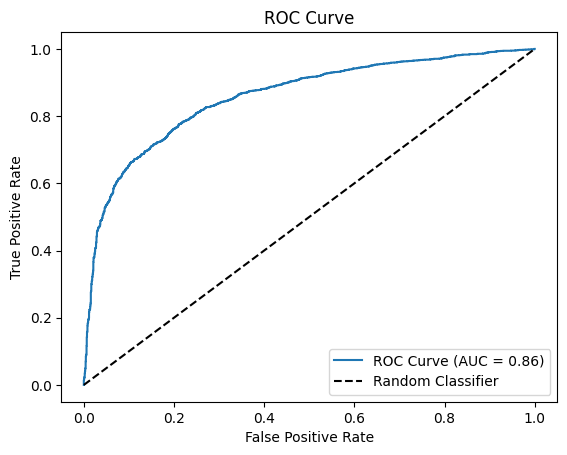

In [8]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Split features and labels
X = dataset_att_embed.drop(columns=['label']).values  # feats
y = dataset_att_embed['label'].values  # labels

# The dataset is divided into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# to tensor
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Linear FC
class SimpleNN(nn.Module):
    def __init__(self, input_size):
        super(SimpleNN, self).__init__()
        self.fc = nn.Linear(input_size, 2) 

    def forward(self, x):
        return self.fc(x)

# config
input_size = X_train.shape[1]
model = SimpleNN(input_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Loss
losses_att = []

# train the probe on training dataset
num_epochs = 3000
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    
    # loss
    losses_att.append(loss.item())

    if (epoch+1) % 50 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# eval the probe on testing dataset
model.eval()
with torch.no_grad():
    test_outputs = model(X_test_tensor)
    _, predicted = torch.max(test_outputs, 1)
    accuracy = accuracy_score(y_test, predicted.numpy())
    print(f'Accuracy on the test set: {accuracy * 100:.2f}%')

# 1. CM
cm = confusion_matrix(y_test, predicted)
print("Confusion Matrix:")
print(cm)

# 2. precison
precision = precision_score(y_test, predicted)
print(f'Precision: {precision:.2f}')

# 3. recall
recall = recall_score(y_test, predicted)
print(f'Recall: {recall:.2f}')

# 4. F1 score
f1 = f1_score(y_test, predicted)
print(f'F1 Score: {f1:.2f}')

# 5. ROC and AUC
probs = model(X_test_tensor)
probs = torch.softmax(probs, dim=1)[:, 1].detach().numpy()

fpr, tpr, _ = roc_curve(y_test, probs)
auc = roc_auc_score(y_test, probs)

# Plot ROC 
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


## Statistically Significant Probing (SS-Probing)

In [9]:
import statsmodels.api as sm

X_train_with_bias = sm.add_constant(X_train)

logit_model = sm.Logit(y_train, X_train_with_bias).fit()

print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.460670
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                16000
Model:                          Logit   Df Residuals:                    15743
Method:                           MLE   Df Model:                          256
Date:                Fri, 28 Mar 2025   Pseudo R-squ.:                  0.3354
Time:                        23:09:35   Log-Likelihood:                -7370.7
converged:                       True   LL-Null:                       -11090.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0934      0.021      4.396      0.000       0.052       0.135
x1             0.0820      0.

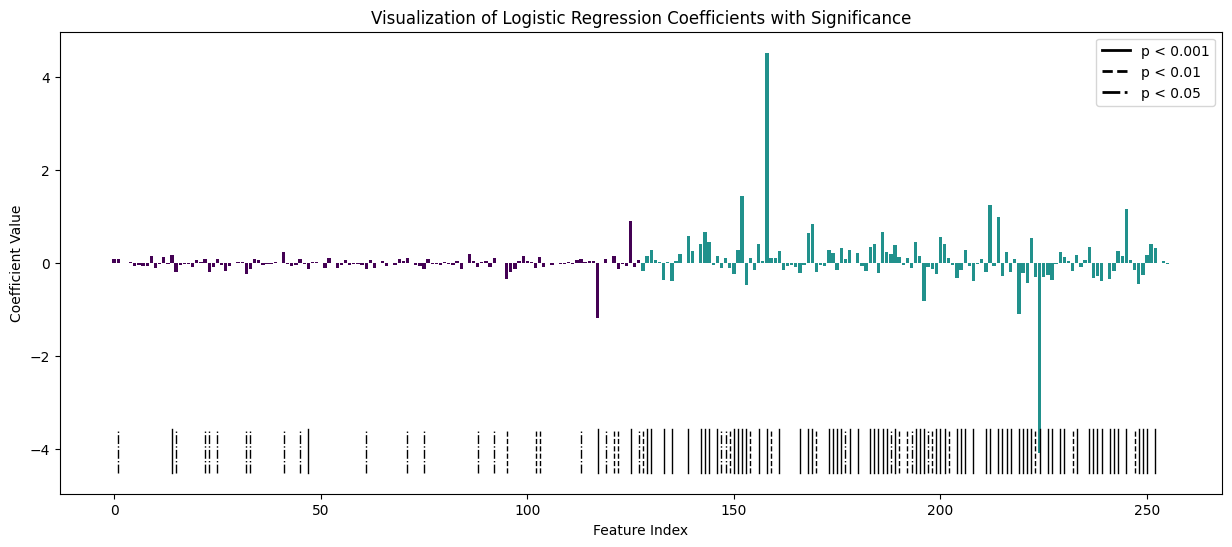

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Extract the coefficients and corresponding p-values of the logistic regression model
coefficients_without_intercept = logit_model.params[1:]  
p_values = logit_model.pvalues[1:]

# define colors for different node embeddings
colors = plt.cm.viridis(np.linspace(0, 1, len(coefficients_without_intercept) // 128 + 1))

# Create a color array, using the same color for every 128 (h_em dimension) bars
bar_colors = [colors[i // 128] for i in range(len(coefficients_without_intercept))]

# plot bar chart
plt.figure(figsize=(15, 6))
plt.bar(range(len(coefficients_without_intercept)), coefficients_without_intercept, color=bar_colors)
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.title('Visualization of Logistic Regression Coefficients with Significance')

# Get the range of the y-axis
y_min, y_max = plt.ylim()
line_length = (y_max - y_min) * 0.1 

# Mark the bottom of the histogram of each significant coefficient
for i, p_value in enumerate(p_values):
    if p_value < 0.001:
        plt.plot([i, i], [y_min, y_min + line_length], color='black', linestyle='-', linewidth=1)  # ***
    elif p_value < 0.01:
        plt.plot([i, i], [y_min, y_min + line_length], color='black', linestyle='--', linewidth=1)  # **
    elif p_value < 0.05:
        plt.plot([i, i], [y_min, y_min + line_length], color='black', linestyle='-.', linewidth=1)  # *

# Add legend to explain significance annotation
legend_lines = [
    plt.Line2D([0], [0], color='black', linestyle='-', linewidth=2, label='p < 0.001'),
    plt.Line2D([0], [0], color='black', linestyle='--', linewidth=2, label='p < 0.01'),
    plt.Line2D([0], [0], color='black', linestyle='-.', linewidth=2, label='p < 0.05')
]
plt.legend(handles=legend_lines, loc='upper right')

plt.show()
